# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 1. Introduction
We recently introduced a new line of office stationery designed to spark creativity and enhance brainstorming sessions. To determine the most effective sales approach for this product line, we tested three different strategies: email outreach, phone calls, and a combination of both. This analysis aims to assess the performance of these methods and provide data-driven insights to refine our sales strategy moving forward.

In this report, we will outline the process of data validation and cleaning, present key findings from the exploratory data analysis, establish a key metric for ongoing business monitoring, and offer strategic recommendations based on the results. By leveraging these insights, we aim to optimize sales efforts and maximize the success of our new product line.



In [12]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# 2. Data Importing and Validation
The original dataset consists of 15,000 rows and 8 columns.

**Week** Column: This column contains integer values ranging from 1 to 6, representing the corresponding weeks, with no missing values. No modifications were required.

**Sales Method** Column: Initially, this column contained five unique values (Email, Call, Email + Call, em + call, email) instead of the expected three. The inconsistencies were due to variations in capitalization and abbreviations. After standardizing the values, the column now correctly reflects the three intended sales methods: Email, Call, and Email + Call.

**Customer ID** Column: This column consists of unique identifiers for each customer and had no missing values. No adjustments were necessary.

**Revenue** Column: A total of 1,074 values were missing in this column. To address this, I replaced the missing values with the mean revenue for each respective sales method.

Years as Customer Column: While this column had no missing values, two rows contained incorrect data. Given that the company was founded in 1984, the maximum possible value should be 39 years. However, two entries had values of 47 and 63, which are impossible. These values were corrected and replaced with 39.

**Number of Site Visits** Column: This column had no missing values, and all data was valid. No changes were necessary.

**State** Column: This column contained 50 unique values, corresponding to all U.S. states, with no missing values. No modifications were required.

Finally, after completing data validation and cleaning, I checked for duplicate rows and found none. The cleaned dataset now contains 15,000 rows and 8 columns, with no missing values.

In [13]:
# import data
sales_data = pd.read_csv('product_sales.csv')

In [14]:
sales_data.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [15]:
sales_data.shape

(15000, 8)

In [16]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [17]:
sales_data.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [18]:
# Check the value counts to ensure there are only 3 unique values
print(sales_data['sales_method'].value_counts())

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


In [19]:
# Define a mapping dictionary to correct the inconsistent values
sales_method_mapping = {
    'Email': 'Email',
    'Call': 'Call',
    'Email + Call': 'Email + Call',
    'em + call': 'Email + Call',
    'email': 'Email'
}

# Apply the mapping to the 'sales_method' column
sales_data['sales_method'] = sales_data['sales_method'].map(sales_method_mapping)

# Check the value counts to ensure there are only 3 unique values
print(sales_data['sales_method'].value_counts())

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


In [20]:
# find mean revenue for each sales method
mean_revenue_by_sales_method = sales_data.groupby('sales_method')['revenue'].mean()
print(mean_revenue_by_sales_method)

sales_method
Call             47.597467
Email            97.127684
Email + Call    183.651233
Name: revenue, dtype: float64


In [21]:
def replace_null_revenue(row):
    """
    Replaces null (NaN) values in the 'revenue' column of a pandas DataFrame with the mean (or median) revenue
    for the corresponding 'sales_method' group.

    Parameters:
    -----------
    row : pandas Series
        A single row of a pandas DataFrame containing the 'revenue' and 'sales_method' columns.

    Returns:
    --------
    float
        The value of the 'revenue' column for the given row, either the original value if it is not null, or
        the mean (or median) revenue for the corresponding 'sales_method' group if it is null.
    """
    if pd.isnull(row['revenue']):
        return mean_revenue_by_sales_method[row['sales_method']]
    else:
        return row['revenue']

In [22]:
# apply function to the revenue column
sales_data['revenue'] = sales_data.apply(replace_null_revenue, axis=1)

# check for any null values in the revenue column
print(sales_data['revenue'].isnull().sum())

0


In [23]:
sales_data[sales_data['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [28]:
# find all values > 39 and replace with 39
sales_data.loc[sales_data['years_as_customer'] > 39, 'years_as_customer'] = 39

In [29]:
# check to see if replacement worked
sales_data[sales_data['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [34]:
print(f"Number of rows with invalid values: {sales_data['years_as_customer'].gt(39).sum()}")

Number of rows with invalid values: 0


In [30]:
# check number of unique values for state
sales_data['state'].nunique()

50

In [31]:
# check if any duplicate rows
duplicate_rows = sales_data[sales_data.duplicated()]
duplicate_rows

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


In [33]:
print(f"Number of duplicate rows: {sales_data.duplicated().sum()}")

Number of duplicate rows: 0


In [35]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


# 3. Exploratory Analysis
## A. Customer Distribution by Sales Method
Over the six-week period, the Email sales method had the highest number of customers, totaling 7,466. This was followed by the Call method, which engaged 4,962 customers, while the combined Email + Call approach had the lowest count, reaching 2,572 customers.

In [36]:
# find number of customers for each sales method
customers_by_sales_method = sales_data['sales_method'].value_counts()
print(customers_by_sales_method)

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


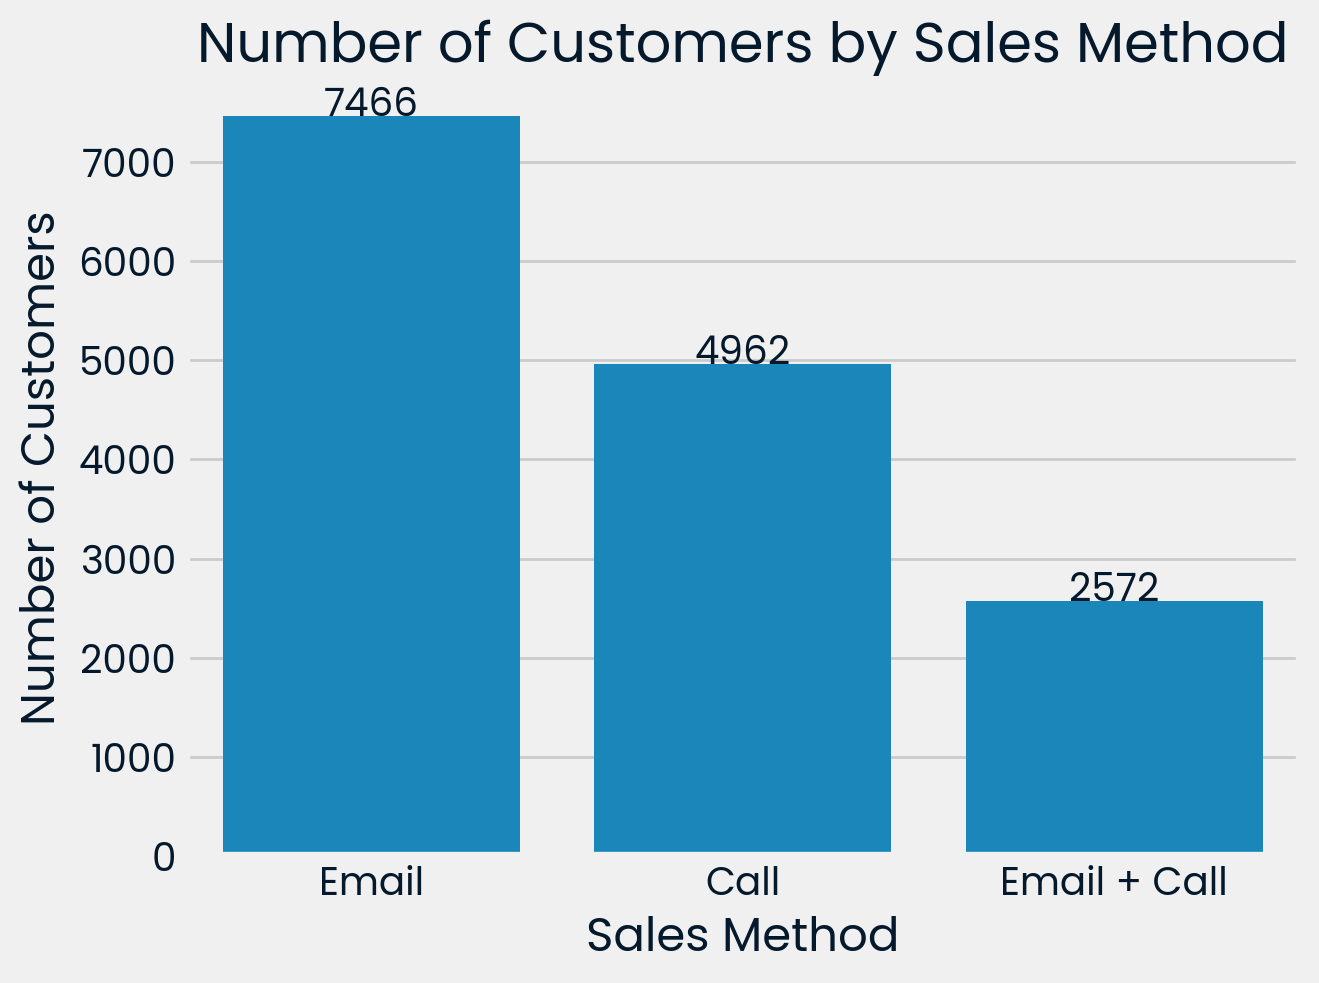

In [37]:
customers_by_sales_method = sales_data['sales_method'].value_counts()

ax = sns.barplot(x=customers_by_sales_method.index, y=customers_by_sales_method.values)

plt.title("Number of Customers by Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Number of Customers")

# Add value labels to each bar
for i, v in enumerate(customers_by_sales_method.values):
    ax.text(i, v + 0.5, str(v), ha='center')

plt.show()

## B. Revenue Distribution Overall and by Sales Method

How does revenue vary across different sales methods and overall? 

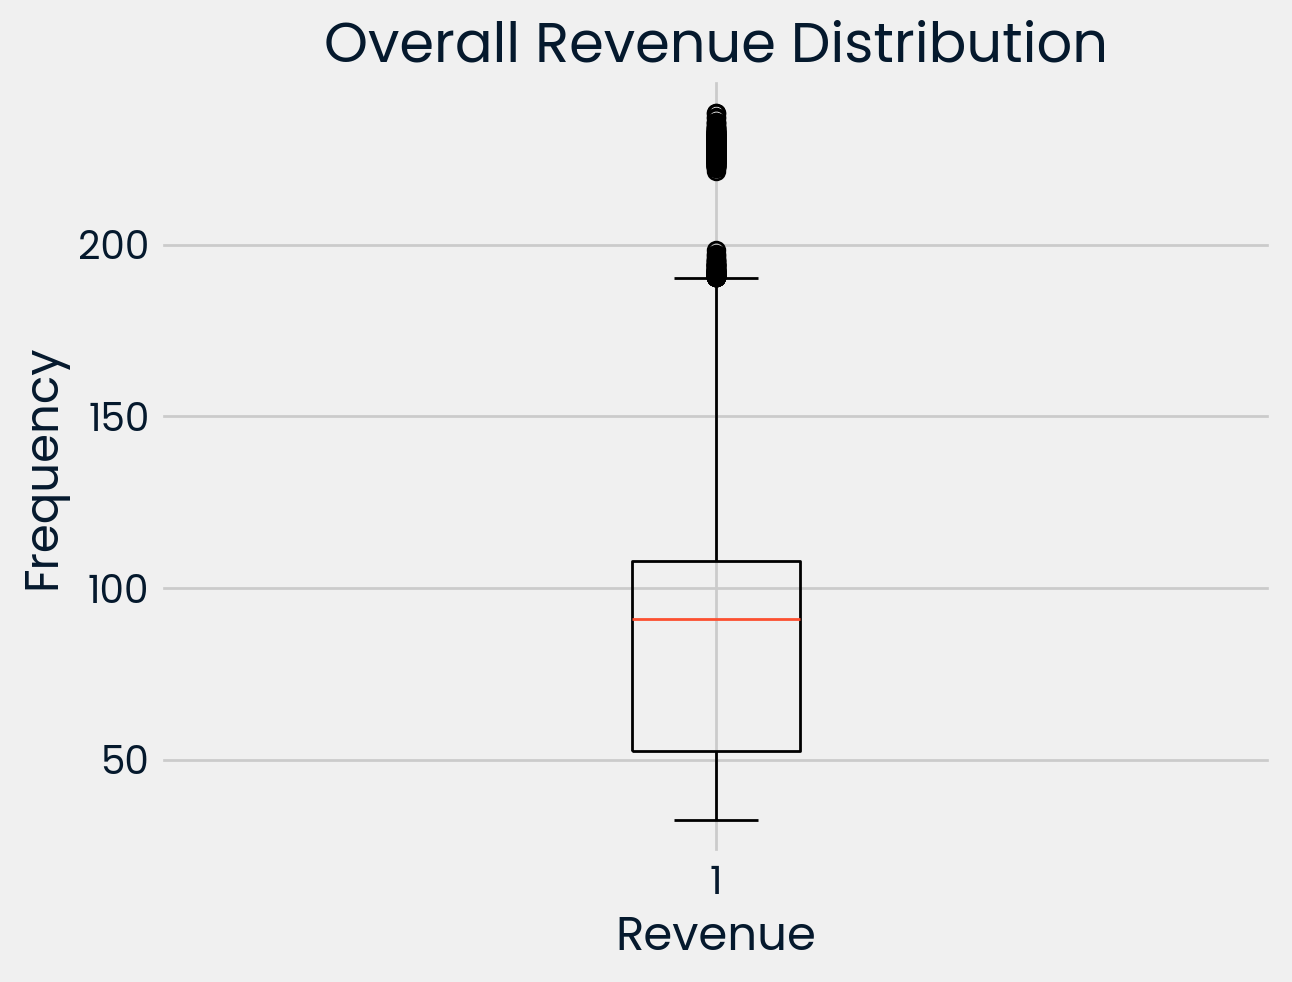

In [38]:
# Histogram for overall revenue
plt.boxplot(sales_data['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Overall Revenue Distribution')
plt.show()

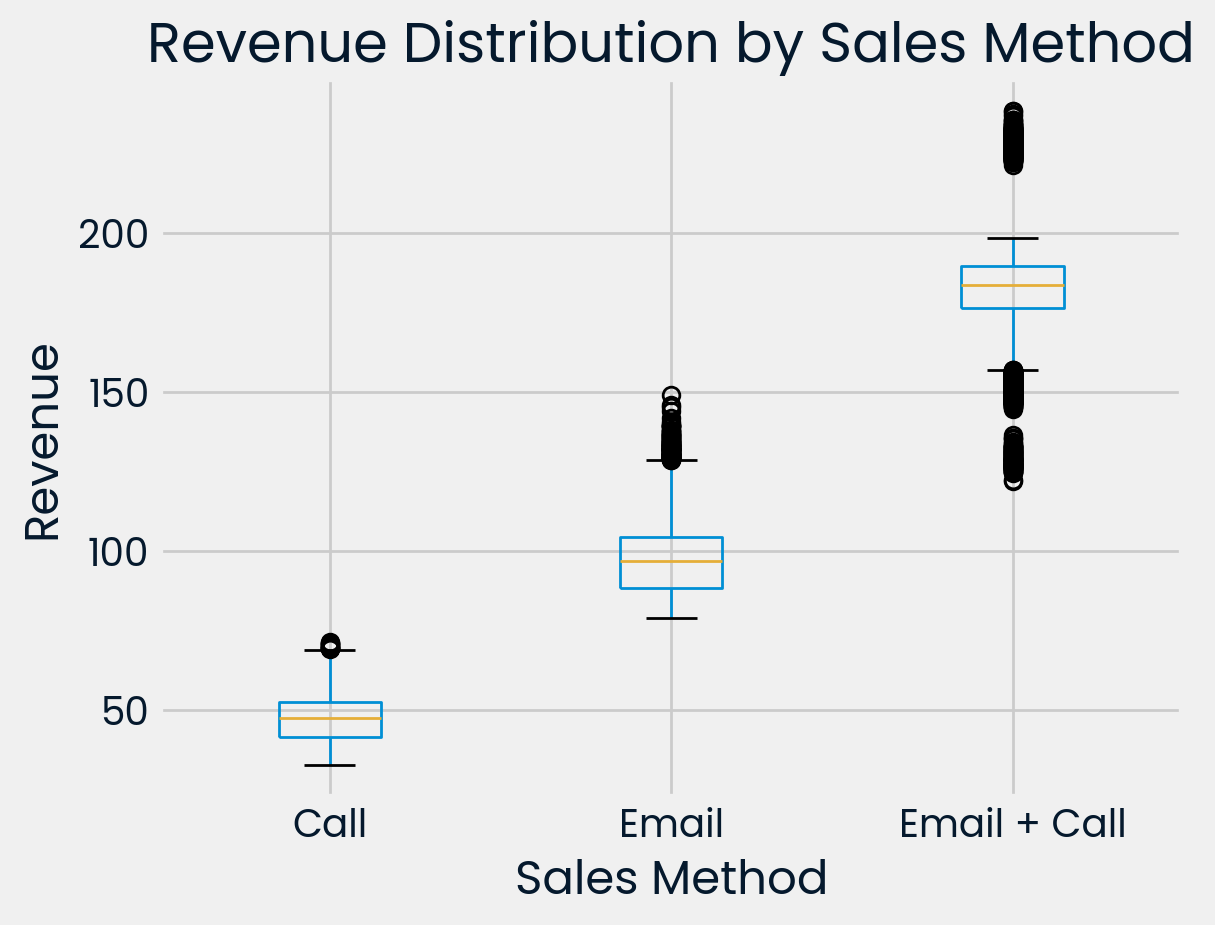

In [39]:
sales_data.boxplot(column='revenue', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

## C. Revenue Trends Over Time by Sales Method

This section explores the revenue trends over the six-week period for each sales method, highlighting any fluctuations or patterns specific to Email, Call, and Email + Call strategies.

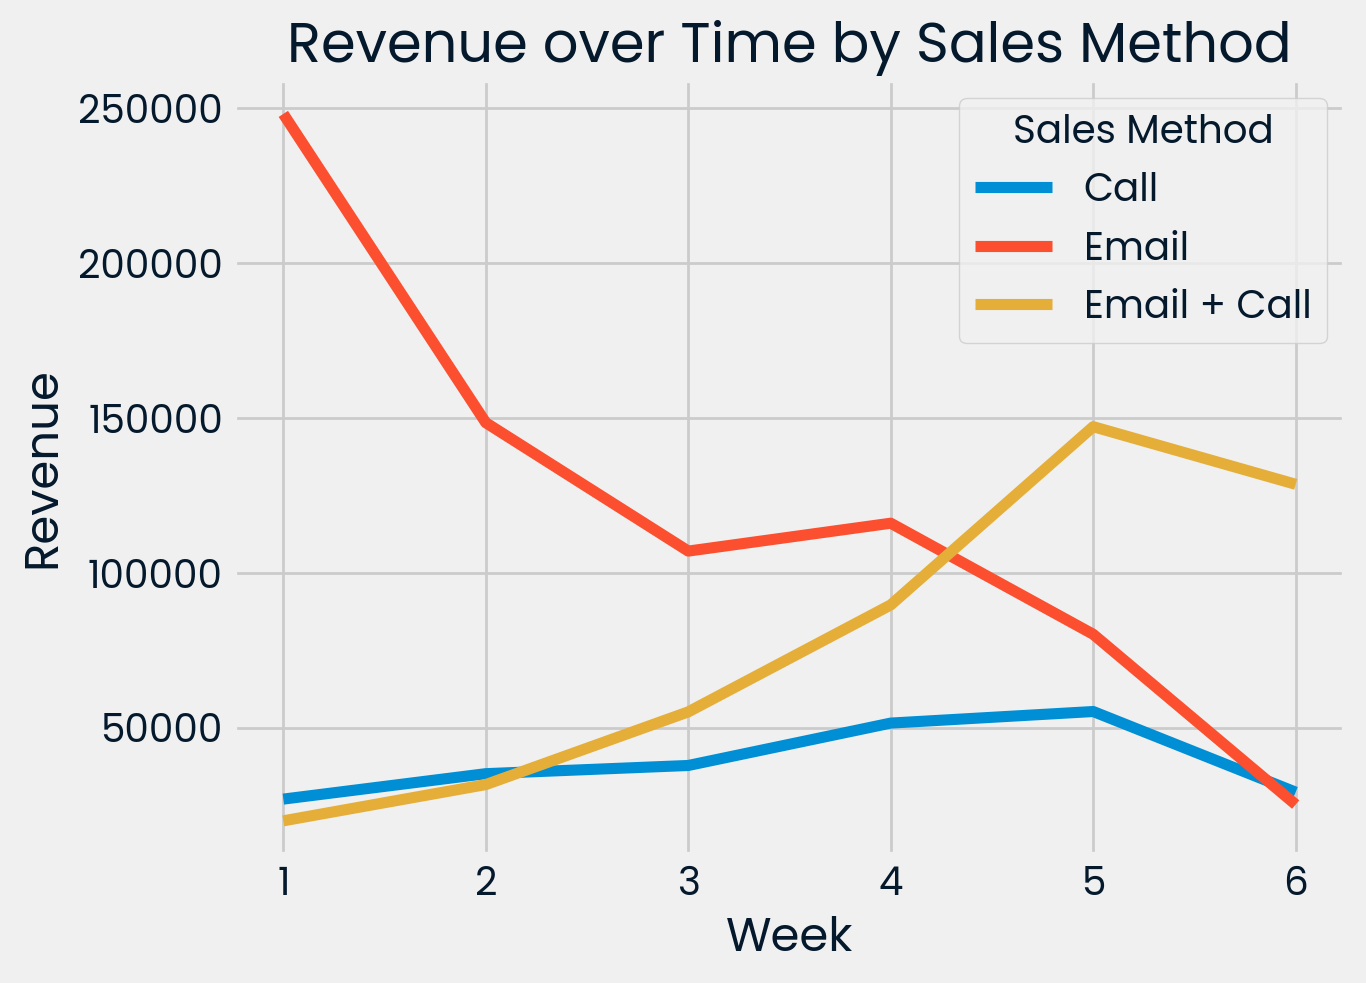

In [40]:
revenue_over_time = sales_data.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
revenue_over_time.plot()
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.title('Revenue over Time by Sales Method')
plt.legend(title='Sales Method')
plt.show()

Based on the table above, the following observations can be made:

In Week 1, the 'Email' sales method generated the highest revenue at $48,122.68, followed by 'Call' at $27,015.93 and 'Email + Call' at $20,007.40. Notably, the 'Email' method required the least effort from the sales team, making it the most efficient approach in the first week.

Over the six-week period, revenue from the 'Email' method steadily decreased, suggesting diminishing returns as time passed. In contrast, the 'Call' method showed an overall upward trend in revenue, although with some fluctuations. However, towards the end of the period, the revenue from 'Call' began to decline.

The 'Email + Call' method exhibited a strong and consistent revenue increase throughout the six weeks, indicating its potential for long-term growth. This method could be the most advantageous for sustained revenue generation compared to the other two approaches.

In conclusion, while the 'Email + Call' method shows the greatest promise for long-term revenue, it requires more effort from the sales team. The 'Email' method starts strong but experiences a steady decline, and the 'Call' method demonstrates growth with some volatility. It is important to balance the efficiency and effort required for each method when deciding which to continue using.

In [41]:
revenue_over_time

sales_method,Call,Email,Email + Call
week,,,
1,27015.934407,248122.682313,20007.400954
2,35219.944012,148478.487577,31702.115744
3,37865.583880,107047.993157,55164.933140
4,51545.486149,116044.223157,89682.576419
5,55279.216281,80201.111052,147195.006815
6,29252.466808,25260.792947,128598.937094


## D. Investigating Other Differences Between Customers in Each Sales Group

The charts below reveal some intriguing insights:

The number of years of business with customers across each sales method appears to be relatively consistent.

The 'Email + Call' sales method led to an average of 12 sales per customer, compared to 10 sales for both the 'Call' and 'Email' methods. Customers using the 'Email + Call' method typically purchased between 10 and 13 items, whereas customers contacted via 'Email' and 'Call' tended to buy between 8 and 11 items. This suggests that customers engaged through the 'Email + Call' method are more likely to make larger purchases, potentially driving higher revenue.

Additionally, customers reached through the 'Email + Call' method had more site visits on average than those contacted via 'Email' or 'Call' alone. This could indicate that this approach encourages more interaction with our website, which may contribute to increased revenue.

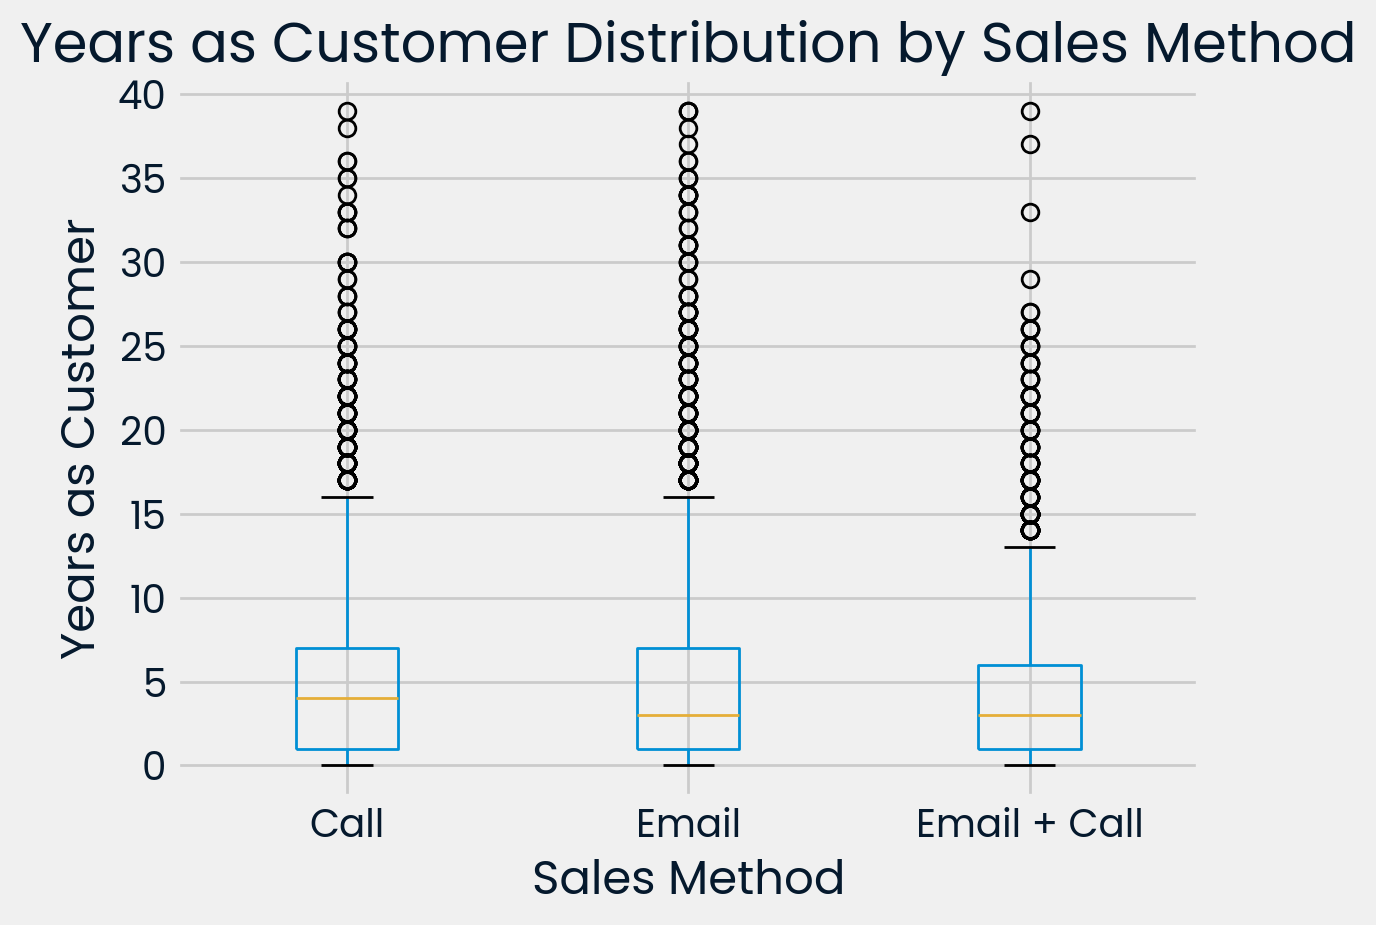

In [42]:
# Example: Boxplot for years_as_customer by sales_method
sales_data.boxplot(column='years_as_customer', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.title('Years as Customer Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

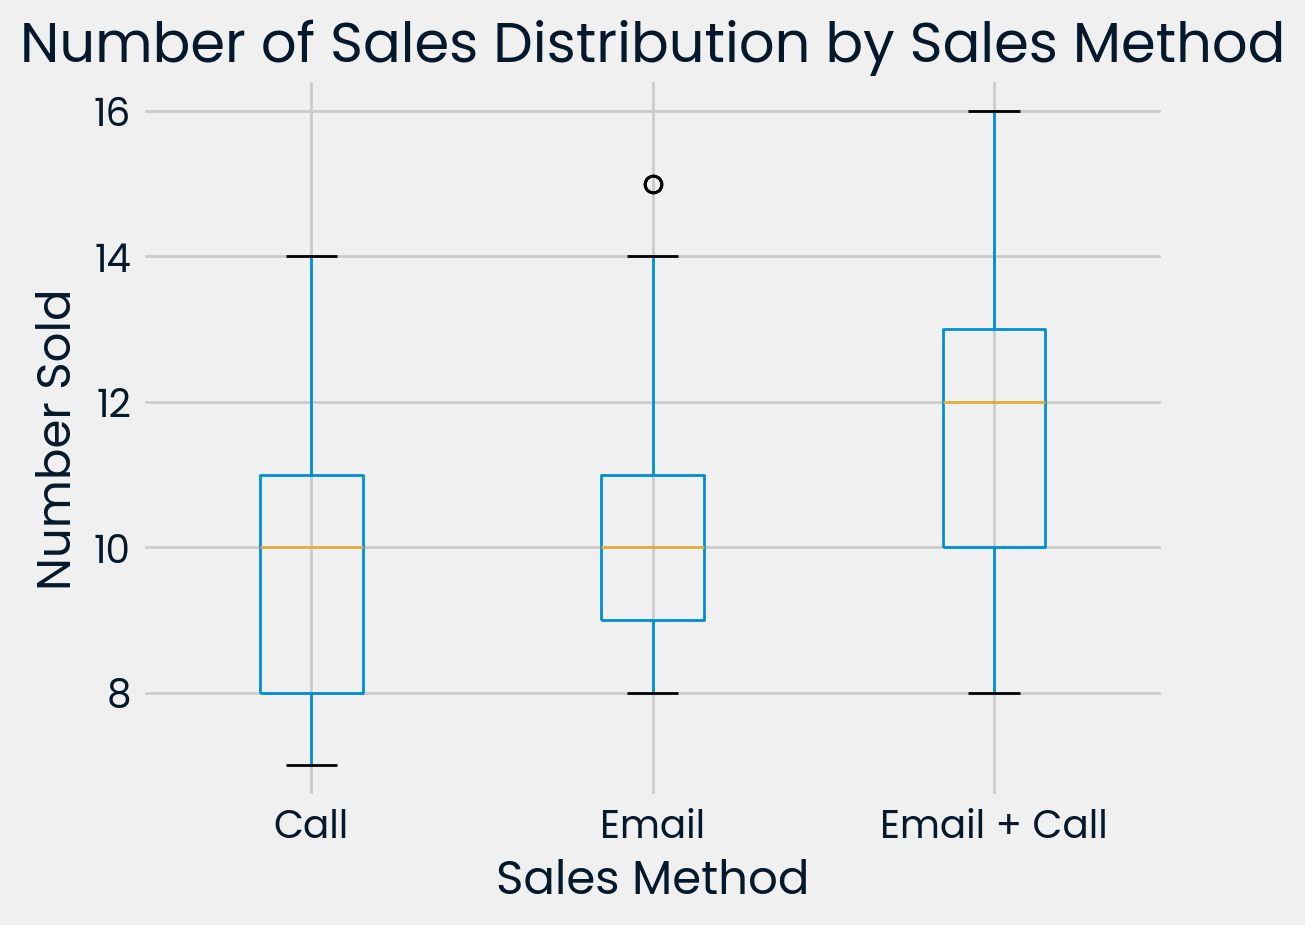

In [43]:
# Example: Boxplot for years_as_customer by sales_method
sales_data.boxplot(column='nb_sold', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Number Sold')
plt.title('Number of Sales Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

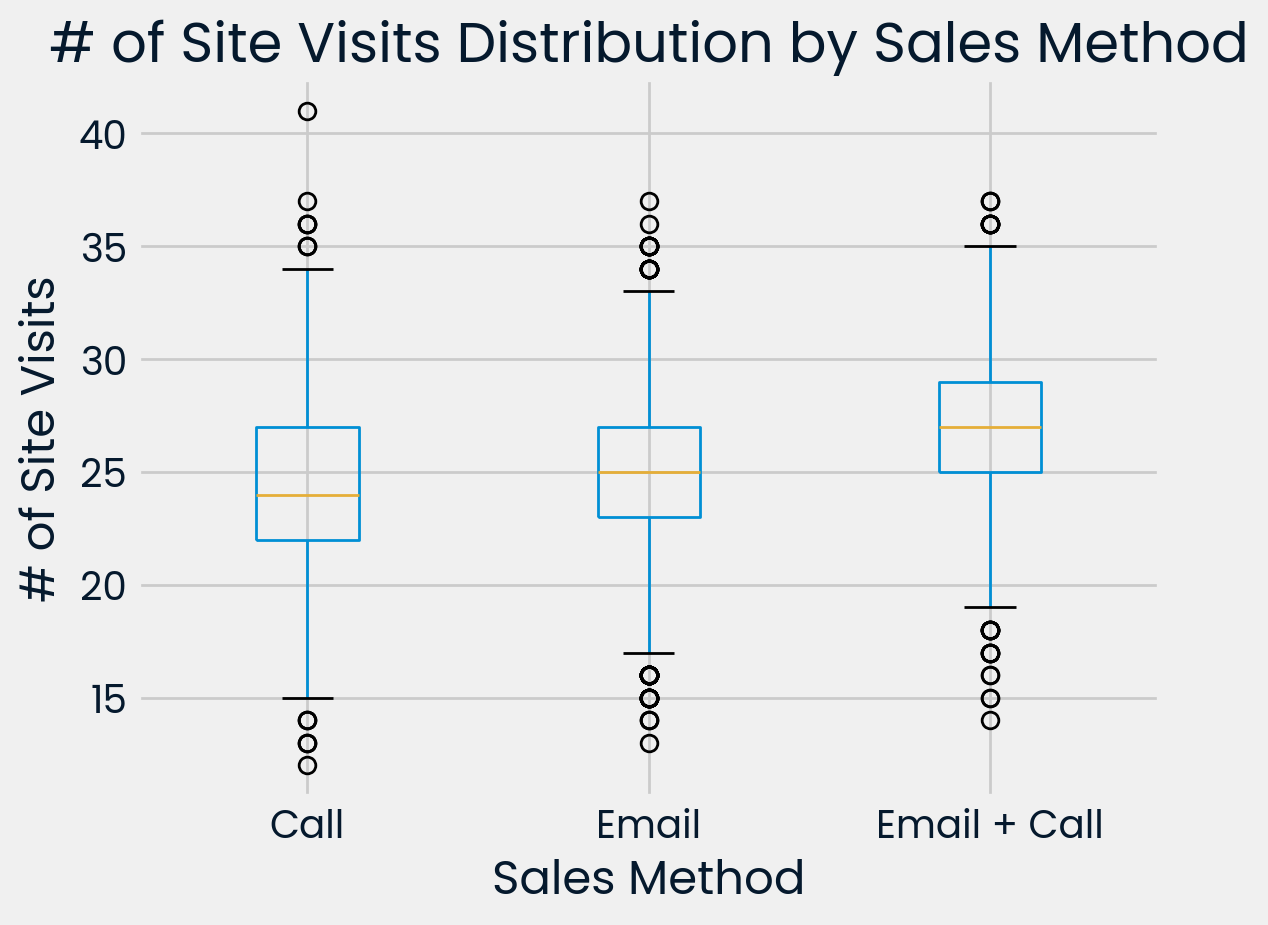

In [44]:
# Example: Boxplot for years_as_customer by sales_method
sales_data.boxplot(column='nb_site_visits', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('# of Site Visits')
plt.title('# of Site Visits Distribution by Sales Method')
plt.suptitle('')  # Remove auto-generated sup-title
plt.show()

# Other comparisons can be performed similarly (e.g., nb_site_visits, state, etc.)

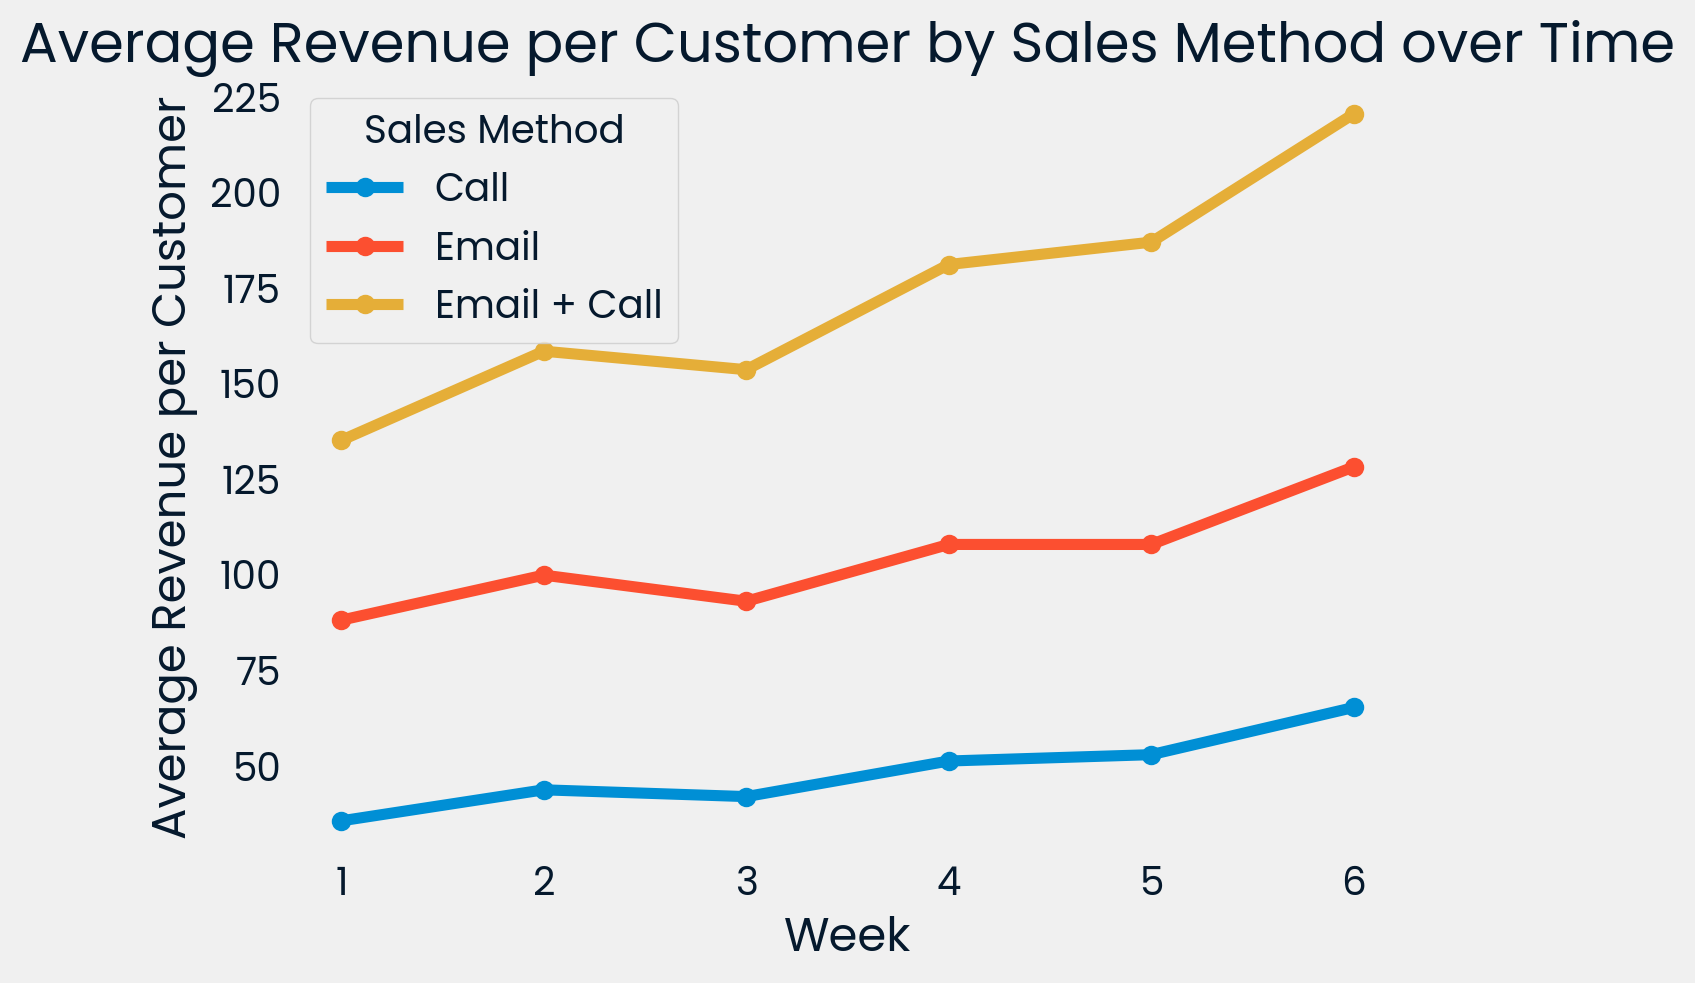

In [45]:
grouped_data = sales_data.groupby(['week', 'sales_method']).agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()
grouped_data['average_revenue_per_customer'] = grouped_data['revenue'] / grouped_data['customer_id']
pivot_data = grouped_data.pivot_table(index='week', columns='sales_method', values='average_revenue_per_customer')
pivot_data.plot(kind='line', marker='o')
plt.xlabel('Week')
plt.ylabel('Average Revenue per Customer')
plt.title('Average Revenue per Customer by Sales Method over Time')
plt.legend(title='Sales Method')
plt.grid()
plt.show()

# 4. Defining Business Metrics to Track Performance - Average Revenue per Customer Sales Effort (ARPSE)

To assess the performance of each sales method more effectively, I developed a metric called Average Revenue per Customer Sales Effort (ARPSE). This metric accounts for the relative difficulty of each sales method by factoring in the time and effort required. For this purpose:

Email has a sales effort value of 0.5
Email + Call is assigned a value of 1
Call is given a value of 3
The formula for ARPSE is as follows:

### ARPSE = (Total Revenue for Method) / (Number of Customers * Sales Effort)

This metric allows us to evaluate how much revenue is generated per unit of sales effort for each method, providing a clearer comparison of their overall effectiveness.

In [46]:
# Define the sales effort for each sales method
sales_effort = {
    'Email': 0.5,
    'Call': 3,
    'Email + Call': 1
}

# Group the data by sales_method and aggregate the total revenue and number of customers
grouped_data = sales_data.groupby('sales_method').agg({'revenue': 'sum', 'customer_id': 'count'}).reset_index()

# Calculate ARCPSE for each sales method
grouped_data['ARCPSE'] = grouped_data.apply(lambda row: row['revenue'] / (row['customer_id'] * sales_effort[row['sales_method']]), axis=1)

# Display the ARCPSE for each sales method
print(grouped_data[['sales_method', 'ARCPSE']])

   sales_method      ARCPSE
0          Call   15.865822
1         Email  194.255368
2  Email + Call  183.651233


The ARPSE results reveal that Email has the highest value at 194.25, followed by Email + Call at 183.65, and finally Call at 15.86. This indicates that the Email method is the most efficient in terms of revenue generated per unit of effort.

However, additional factors must be considered. The Email + Call method not only resulted in more website visits but also led to a higher average number of items purchased. Furthermore, this method showed a consistent increase in revenue over the six-week period. In contrast, while the Call method generated strong revenue in week 1, it experienced a decline over time.

# Conclusion and Recommendations
Based on the comprehensive analysis, it is recommended to prioritize the Email + Call method for the following reasons:

While Email has the highest ARPSE, the Email + Call method fosters greater customer engagement, as indicated by higher website visits and an increased number of items purchased. This level of engagement is likely to build stronger customer relationships and support long-term growth.
The Email + Call method has demonstrated a consistent upward trend in revenue over the six-week period, suggesting its potential for sustained success.
On the other hand, the Call method, despite its early success, is the least efficient in terms of effort versus revenue and shows a downward revenue trend over time.
In conclusion, the Email + Call method should be the focus for future sales efforts, as it offers better customer engagement, steady revenue growth, and a more sustainable balance of effort and return.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation